In [1]:
# Word-cloud demo
# Creating and configuring different types of word clouds
# Subplotting to create arrays of plots

In [2]:
import wordcloud as wc
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# read text from a file

def readtext(filename):
    '''
    Read a text file into a string
    filename - the name of the file
    return - a string
    '''
    with open(filename, 'r') as infile:
        return infile.read()


In [4]:
hamilton = readtext('hamilton.txt')
len(hamilton)
hamilton[:100]

'Alexander Hamilton Speech in the New York Convention, 24 June 1788\nI am persuaded, Mr. Chairman, tha'

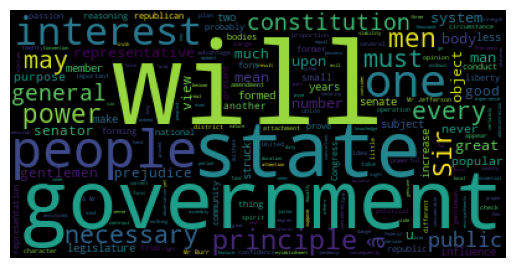

In [5]:
# simplest wordcloud configuration possible

# define the word cloud engine
cloud = wc.WordCloud()

# generate the cloud image from a bunch of text
ham_cloud = cloud.generate(hamilton)

# show it!
plt.axis('off')
plt.imshow(ham_cloud)
plt.savefig('hamilton.png')

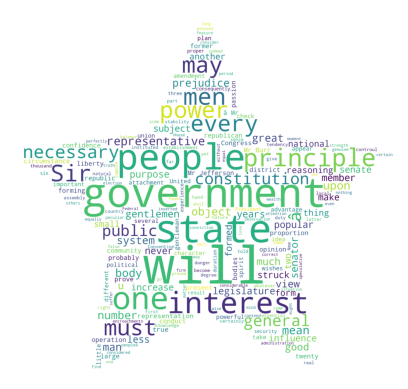

In [13]:
# A fancier customized word cloud
# demonstrate sizing, color schemes, shaping (masking), background, etc

# read the mask and convert to gray scale (2D)
star = np.array(Image.open('mask_star.png'))[:, :, 0]
cloud = wc.WordCloud(
    width=600, height =600,
    colormap = 'viridis',
    background_color = 'white',
    mask = star)
hamstar_cloud = cloud.generate(hamilton)
plt.axis('off')
plt.imshow(hamstar_cloud)
plt.savefig('hamstar.png')
plt.show()

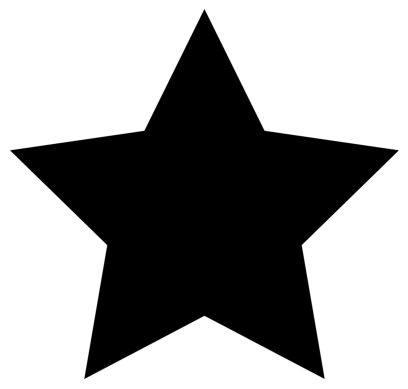

In [7]:
plt.axis('off')
plt.imshow(star, cmap='gray')

In [8]:
# A digression of subplots (visualization arrays)
img = np.random.randint(10, size=(100,100))
img

array([[7, 0, 7, ..., 9, 9, 2],
       [2, 3, 3, ..., 0, 5, 6],
       [3, 3, 4, ..., 9, 6, 7],
       ...,
       [6, 6, 1, ..., 5, 6, 9],
       [7, 5, 7, ..., 2, 8, 6],
       [0, 3, 8, ..., 9, 5, 9]])

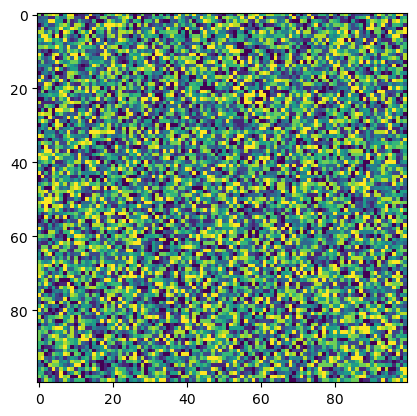

In [9]:
plt.imshow(img)

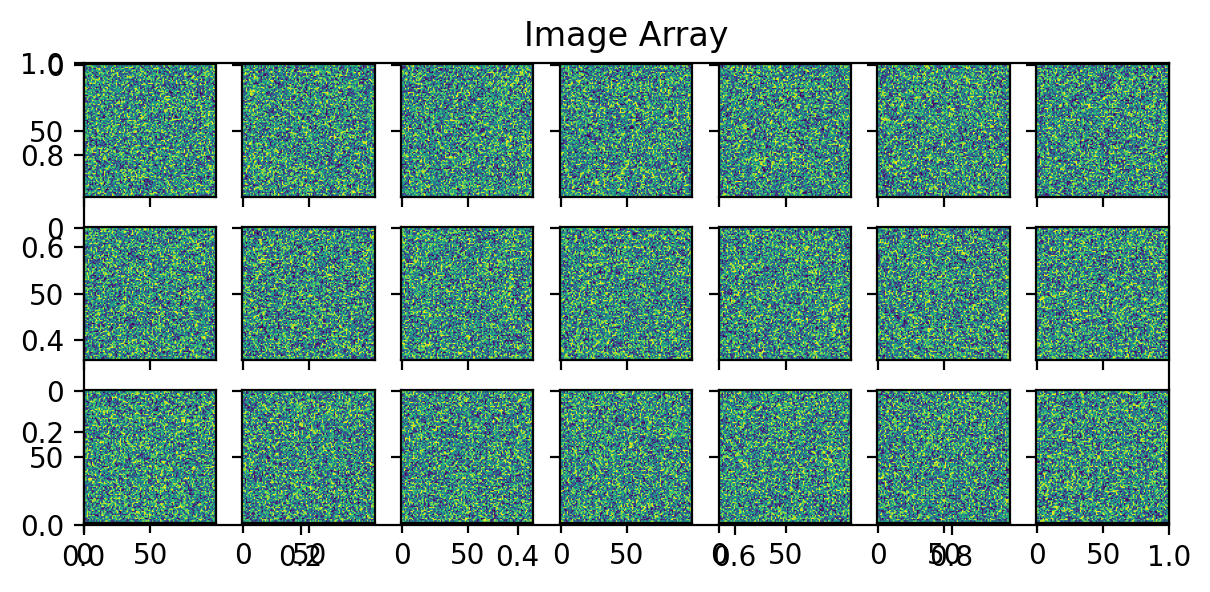

In [10]:
rows = 3
columns = 7

fig = plt.figure(figsize=(columns, rows), dpi=200)

plt.title('Image Array')
# generate the subplots
for slot in range(1, columns * rows + 1):
    fig.add_subplot(rows, columns, slot)
    img = np.random.randint(10, size=(100,100))
    plt.imshow(img)
    
# Remove the inner axis labels
for ax in fig.get_axes():
    ax.label_outer()
    
plt.savefig('image_array.png')
plt.show()

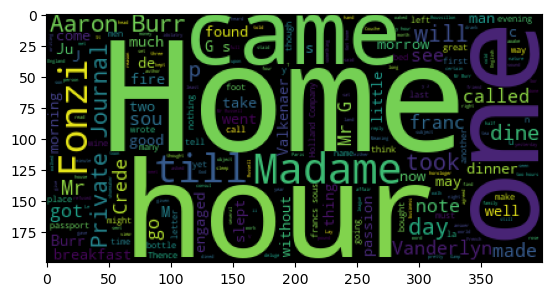

In [11]:
# Side-by-side comparions of hamilton and burr
burr = readtext('burr.txt')
cloud = wc.WordCloud()
burr_cloud = cloud.generate(burr)

plt.imshow(burr_cloud)

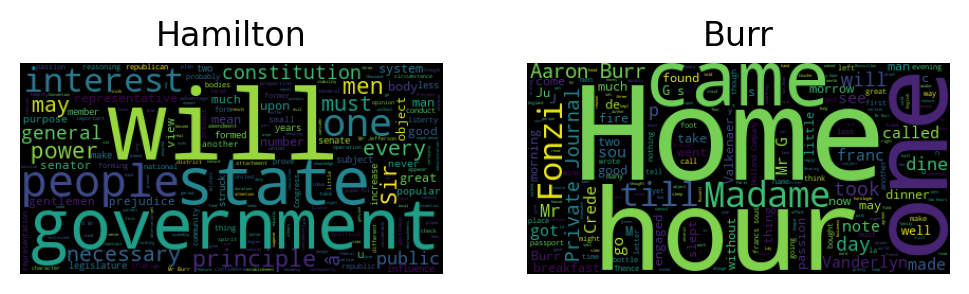

In [12]:
fig = plt.figure(figsize=(6,3), dpi=200)
fig.add_subplot(1, 2, 1)
plt.imshow(ham_cloud)
plt.title('Hamilton')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(burr_cloud)
plt.title('Burr')
plt.axis('off')

plt.savefig('hamilton_burr.png')
plt.show()